# **Importing Dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

data = pd.read_excel('Axis+Superstore+Dataset(2)(1).xlsx')
data.head()

,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# **Exploring Data**

In [2]:
#summary of dataset
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [3]:
#checking for datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
Ship Mode        9994 non-null object
Customer ID      9994 non-null object
Customer Name    9994 non-null object
Segment          9994 non-null object
Country          9994 non-null object
City             9994 non-null object
State            9994 non-null object
Postal Code      9994 non-null int64
Region           9994 non-null object
Product ID       9994 non-null object
Category         9994 non-null object
Sub-Category     9994 non-null object
Product Name     9994 non-null object
Sales            9994 non-null float64
Quantity         9994 non-null int64
Discount         9994 non-null float64
Profit           9994 non-null float64
dtypes: float64(3), int64(2), object(12)
memory usage: 858.9+ KB


In [4]:
#checking for null values
data.isnull().sum()

Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

* So there are no missing values.
* There are 13 features in data, and 9994 rows.

# **Check for Duplicates**

In [5]:
#no. of duplicated rows
data.duplicated().sum()

1

* 17 duplicated values are present which is 0.17% of data. So, it can be deleted.

In [6]:
#drop duplicated values
data=data.drop_duplicates()

In [7]:
#Summary of dataset after dropping duplicates
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,55191.576403,229.852846,3.789753,0.156188,28.660971
std,32065.074478,623.276074,2.225149,0.206457,234.271476
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.731000
50%,56560.000000,54.480000,3.000000,0.200000,8.671000
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


* Now there are 9977 rows in the dataset

In [8]:
#unique no. of rows in each columns
data.nunique()

Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            6144
Quantity           14
Discount           12
Profit           7545
dtype: int64

* The data is only for 1 country. We can remove the country column.
* Our data covers the details of sales of 49 states, 531 cities divided in 4 different regions.

In [9]:
#dropping unnecessary columns
data= data.drop('Country', axis=1)

# **Exploring city, state, postal code, and region**

Every city has different Postal Codes, So we should drop one of the two columns.

In [10]:
#saving data in new variable after dropping postal code
new_data = data.drop('Postal Code' , axis=1)

new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 0 to 9993
Data columns (total 15 columns):
Ship Mode        9993 non-null object
Customer ID      9993 non-null object
Customer Name    9993 non-null object
Segment          9993 non-null object
City             9993 non-null object
State            9993 non-null object
Region           9993 non-null object
Product ID       9993 non-null object
Category         9993 non-null object
Sub-Category     9993 non-null object
Product Name     9993 non-null object
Sales            9993 non-null float64
Quantity         9993 non-null int64
Discount         9993 non-null float64
Profit           9993 non-null float64
dtypes: float64(3), int64(1), object(11)
memory usage: 819.7+ KB


# **Checking Region**

In [11]:
#Unique no. of regions
new_data['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

There are only four regions. Looking at the data, we can see that we have three categorical variables, which are basically related.
* City :- Having the most number of unique values
* State :- Having number of unique values less than city
* Region :- Only four unique values

# **Checking Sub-category & Category**

In [12]:
#Comparing values in category, and subcategory
print(new_data['Sub-Category'].unique())
print(new_data['Category'].unique())

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
['Furniture' 'Office Supplies' 'Technology']


# **Correlation Check**

In [13]:
attributes = ['Sales','Quantity','Discount','Profit']
corr_mat = new_data.corr()
corr_mat

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200808,-0.028197,0.479067
Quantity,0.200808,1.000000,0.008680,0.066241
Discount,-0.028197,0.008680,1.000000,-0.219481
Profit,0.479067,0.066241,-0.219481,1.000000


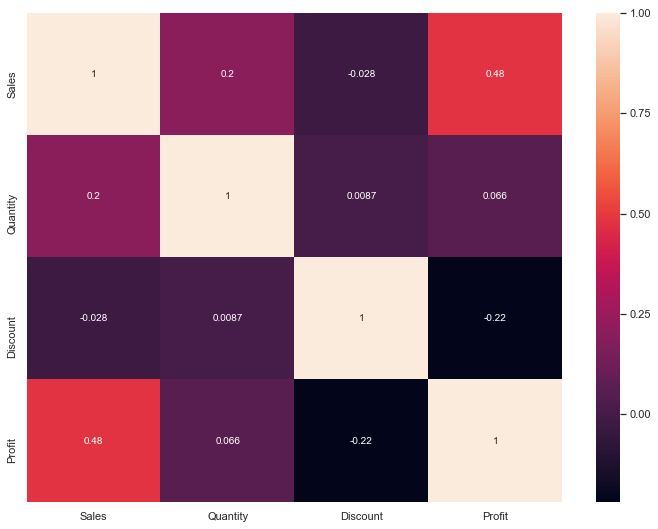

In [14]:
#plotting correlation matrix
plt.subplots(figsize=(12,9))
sns.heatmap(corr_mat,annot=True)
plt.show()

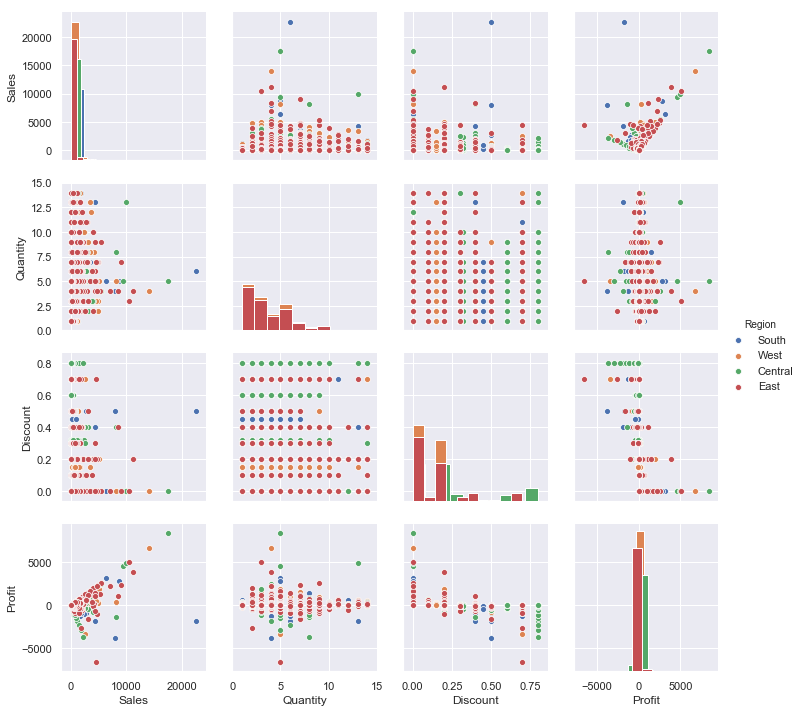

In [15]:
#plotting pair plot (Region wise)
sns.pairplot(new_data, hue='Region' , diag_kind="hist")

# **It seems Profit is highly correlated with Sales.**
**Sales v/s Profit**

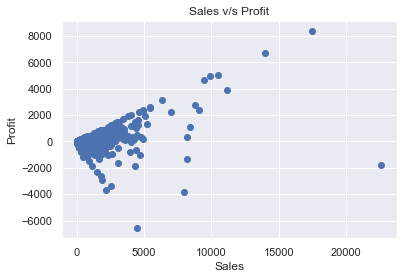

In [16]:
#scatter plot
plt.scatter(data['Sales'],data['Profit'])
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales v/s Profit')
plt.show()

At lower sales, a business either gets profit or loss. But, when the sales are high, a business mostly gets profit.

**Profit to Sales Ratio**

In [17]:
#plotting profit v/s sales statewise
profit_to_sales = pd.DataFrame(new_data.groupby('State').sum()[['Sales','Profit']])
profit_to_sales['Profit_to_sales'] = profit_to_sales['Profit']/profit_to_sales['Sales']
profit_to_sales.sort_values(by='Profit_to_sales',inplace = True, ascending = False)
print("Highest 10 Ratios :\n")
print(profit_to_sales[:10])
print('='*70)
print("Lowest 10 Ratios:\n")
print(profit_to_sales[-10:])

Highest 10 Ratios :

                          Sales      Profit  Profit_to_sales
State                                                       
District of Columbia   2865.020   1059.5893         0.369837
Delaware              27451.069   9977.3748         0.363460
Minnesota             29863.150  10823.1874         0.362426
Maine                  1270.530    454.4862         0.357714
Arkansas              11678.130   4008.6871         0.343264
Indiana               53555.360  18382.9363         0.343251
Georgia               49095.840  16250.0433         0.330986
Montana                5589.352   1833.3285         0.328004
Rhode Island          22627.956   7285.6293         0.321975
Michigan              76269.614  24463.1876         0.320746
Lowest 10 Ratios:

                      Sales      Profit  Profit_to_sales
State                                                   
Florida          89473.7080  -3399.3017        -0.037992
Oregon           17431.1500  -1190.4705        -0.068296


* Ohio has the worst profit to sales ratio.
* District of Columbia has the highest profit to sales ratio.
* The states California , New York doesn't come in the list of top 10 states with highest profit to sales ratio that means there is still some room for improvement.

# **Region-wise Analysis**

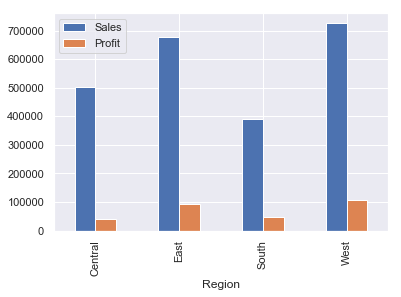

In [18]:
pd.DataFrame(new_data.groupby('Region').sum()[['Sales','Profit']]).plot(kind='bar')

* Western & Eastern regions have shown higher sales and profits as compared to the Southern and central regions.
* Central region has higher sales than the Southern region but it has shown lower profit gains between the two of them.

# **State-wise Analysis**

In [19]:
#Top 10 states with maximum number of items sold
new_data.groupby('State').count()['Quantity'].sort_values(ascending= False)[:10]

State
California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               468
Florida            383
Michigan           255
North Carolina     249
Name: Quantity, dtype: int64

In [20]:
#Top 10 states with minimum number of items sold
new_data.groupby('State').count()['Quantity'].sort_values()[:10]

State
Wyoming                  1
West Virginia            4
North Dakota             7
Maine                    8
District of Columbia    10
Vermont                 11
South Dakota            12
Montana                 15
Idaho                   21
Kansas                  24
Name: Quantity, dtype: int64

In [21]:
#total statewise sales in descending order
state_wise_sales = pd.DataFrame(new_data.groupby('State').sum()['Sales']).sort_values(by ='Sales',ascending= False)
state_wise_sales.reset_index(inplace=True)
state_wise_sales.head()

,State,Sales
0,California,457687.6315
1,New York,310876.2710
2,Texas,170188.0458
3,Washington,138641.2700
4,Pennsylvania,116511.9140


In [32]:
#Visualization : Number of orders for each Ship Mode

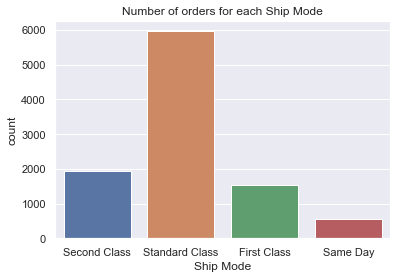

In [28]:
plt.title("Number of orders for each Ship Mode")
sns.countplot(x="Ship Mode",data=data,label="count")

In [31]:
#Visualization : Ship mode and their sales

C:\Users\PC\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


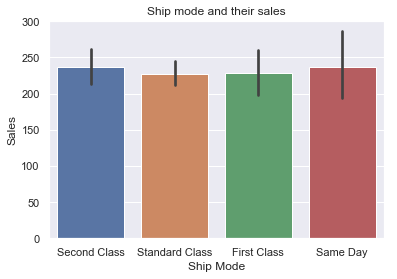

In [30]:
plt.title("Ship mode and their sales")
sns.barplot(x="Ship Mode",y="Sales",data=data)

In [22]:
# Top 10 stores with maximum amount of sales
print('States with maximum amount of sales:\n',state_wise_sales[:10])

print('\n','='*50, '\n')

# Stores with minimum amount of sales
print('States with minimum amount of sales:\n',state_wise_sales[-10:])

States with maximum amount of sales:
           State        Sales
0    California  457687.6315
1      New York  310876.2710
2         Texas  170188.0458
3    Washington  138641.2700
4  Pennsylvania  116511.9140
5       Florida   89473.7080
6      Illinois   80166.1010
7          Ohio   77976.7640
8      Michigan   76269.6140
9      Virginia   70636.7200


States with minimum amount of sales:
                    State     Sales
39            New Mexico  4783.522
40                  Iowa  4579.760
41                 Idaho  4382.486
42                Kansas  2914.310
43  District of Columbia  2865.020
44               Wyoming  1603.136
45          South Dakota  1315.560
46                 Maine  1270.530
47         West Virginia  1209.824
48          North Dakota   919.910


* The company needs to focus more on these 10 states that have least amount of sales.

In [23]:
# Top 10 states with maximum amount of profit
print('States with maximum amount of profit:\n',new_data.groupby('State').sum()['Profit'].sort_values(ascending= False)[:10])

print('\n','='*50, '\n')

# States with minimum amount of profit
print('States with minimum amount of profit:\n',new_data.groupby('State').sum()['Profit'].sort_values()[:10])

States with maximum amount of profit:
 State
California    76381.3871
New York      74038.5486
Washington    33402.6517
Michigan      24463.1876
Virginia      18597.9504
Indiana       18382.9363
Georgia       16250.0433
Kentucky      11199.6966
Minnesota     10823.1874
Delaware       9977.3748
Name: Profit, dtype: float64


States with minimum amount of profit:
 State
Texas            -25729.3563
Ohio             -16959.3178
Pennsylvania     -15559.9603
Illinois         -12607.8870
North Carolina    -7490.9122
Colorado          -6527.8579
Tennessee         -5341.6936
Arizona           -3427.9246
Florida           -3399.3017
Oregon            -1190.4705
Name: Profit, dtype: float64


* Company must focus on cities which made loss.
* They should analyse their resource usage and the categories which are being sold in those states.

In [24]:
#new dataframe having states and regions
state_region = new_data[['State','Region']]

#drop duplicated values
state_region = state_region.drop_duplicates()
state_region

#adding region column to state_wise_sales dataframe
state_wise_sales = pd.merge(state_wise_sales, state_region)

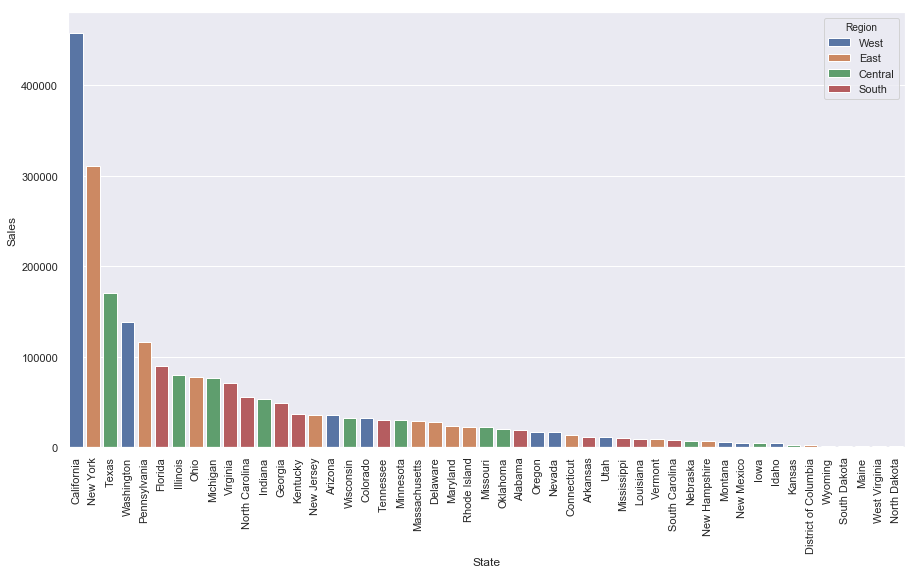

In [25]:
#plotting Sales Statewise
plt.figure(figsize=(15,8))
g= sns.barplot(x='State', y='Sales', data = state_wise_sales, hue='Region', dodge=False)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

* The company has highest sales in the state of California which is around 450k.
* New York is the state that constitutes the second highest sales for the company of around 300k.
* The states of Texas and Washington end up 3rd and 4th on the chart with around 150k and 140k in sales correspondingly.
* Maximum of the sales are done in the west and the east coast regions.